Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Ищенко Анна"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        Lnx = 0
        for k in range(len(self.yk)):
            P = 1
            for i in range(len(self.xk)):
                if i != k:
                    P = P * (x - self.xk[i]) / (self.xk[k] - self.xk[i])
            Lnx = Lnx + self.yk[k] * P
        return Lnx

        raise NotImplementedError()

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


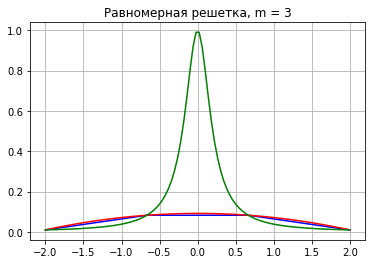

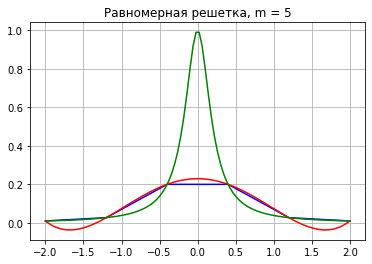

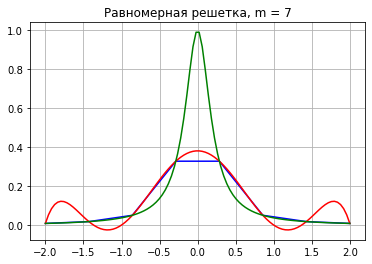

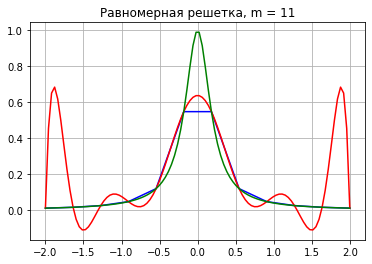

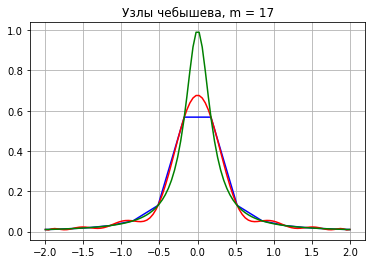

In [4]:
import matplotlib.pyplot as plt

def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)
# с использованием равномерной решетки
for m in ([3, 5, 7, 11]):
    n = m + 1
    xx = np.linspace(-2, 2, n)
    yy = runge_func(xx)
    lagr = LagrangeInterpolator(xx, yy)
    xnew = np.linspace(np.min(xx), np.max(xx), 100)
    ynew = [lagr.__call__(i) for i in xnew]
    fx = [runge_func(i) for i in xnew]
    plt.plot(xx, yy, 'b')
    plt.plot(xnew, ynew, 'r')
    plt.plot(xnew, fx, 'g')
    plt.grid(True)
    ttl = 'Равномерная решетка, m = ' + str(m)
    plt.title(ttl)
    plt.show()

# с использованием решетки Чебышева

b1 = -2
b2 = 2
n = 18
xc = [0.5 * (b1 + b2) + 0.5 * (b2 - b1) * np.cos(np.pi * (2 * j - 1) / (2 * n)) for j in range(1, n+1)]
yc = [runge_func(i) for i in xc]
lagr = LagrangeInterpolator(xc, yc)
xnew = np.linspace(np.min(xc), np.max(xc), 100)
ynew = [lagr.__call__(i) for i in xnew]
fx = [runge_func(i) for i in xnew]
plt.plot(xc, yc, 'b')
plt.plot(xnew, ynew, 'r')
plt.plot(xnew, fx, 'g')
plt.grid(True)
ttl = 'Узлы чебышева, m = ' + str(n-1)
plt.title(ttl)
plt.show()